# Page View Time Series Visualizer

For this project we will visualize time series data using a line chart, bar chart, and box plots. We will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

## Tasks

- Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the ```date``` column.
- Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
- Create a ```draw_line_plot``` function that uses Matplotlib to draw a line chart similar to "Figure_1.png". The title should be ```Daily freeCodeCamp Forum Page Views 5/2016-12/2019```. The label on the x axis should be Date and the label on the y axis should be ```Page Views```.
- Create a ```draw_bar_plot``` function that draws a bar chart similar to "Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of ```Months```. On the chart, the label on the x axis should be ```Years``` and the label on the y axis should be ```Average Page Views```.
- Create a ```draw_box_plot``` function that uses Seaborn to draw two adjacent box plots similar to "Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be ```Year-wise Box Plot (Trend)``` and the title of the second chart should be ```Month-wise Box Plot (Seasonality)```. Make sure the month labels on bottom start at ```Jan``` and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

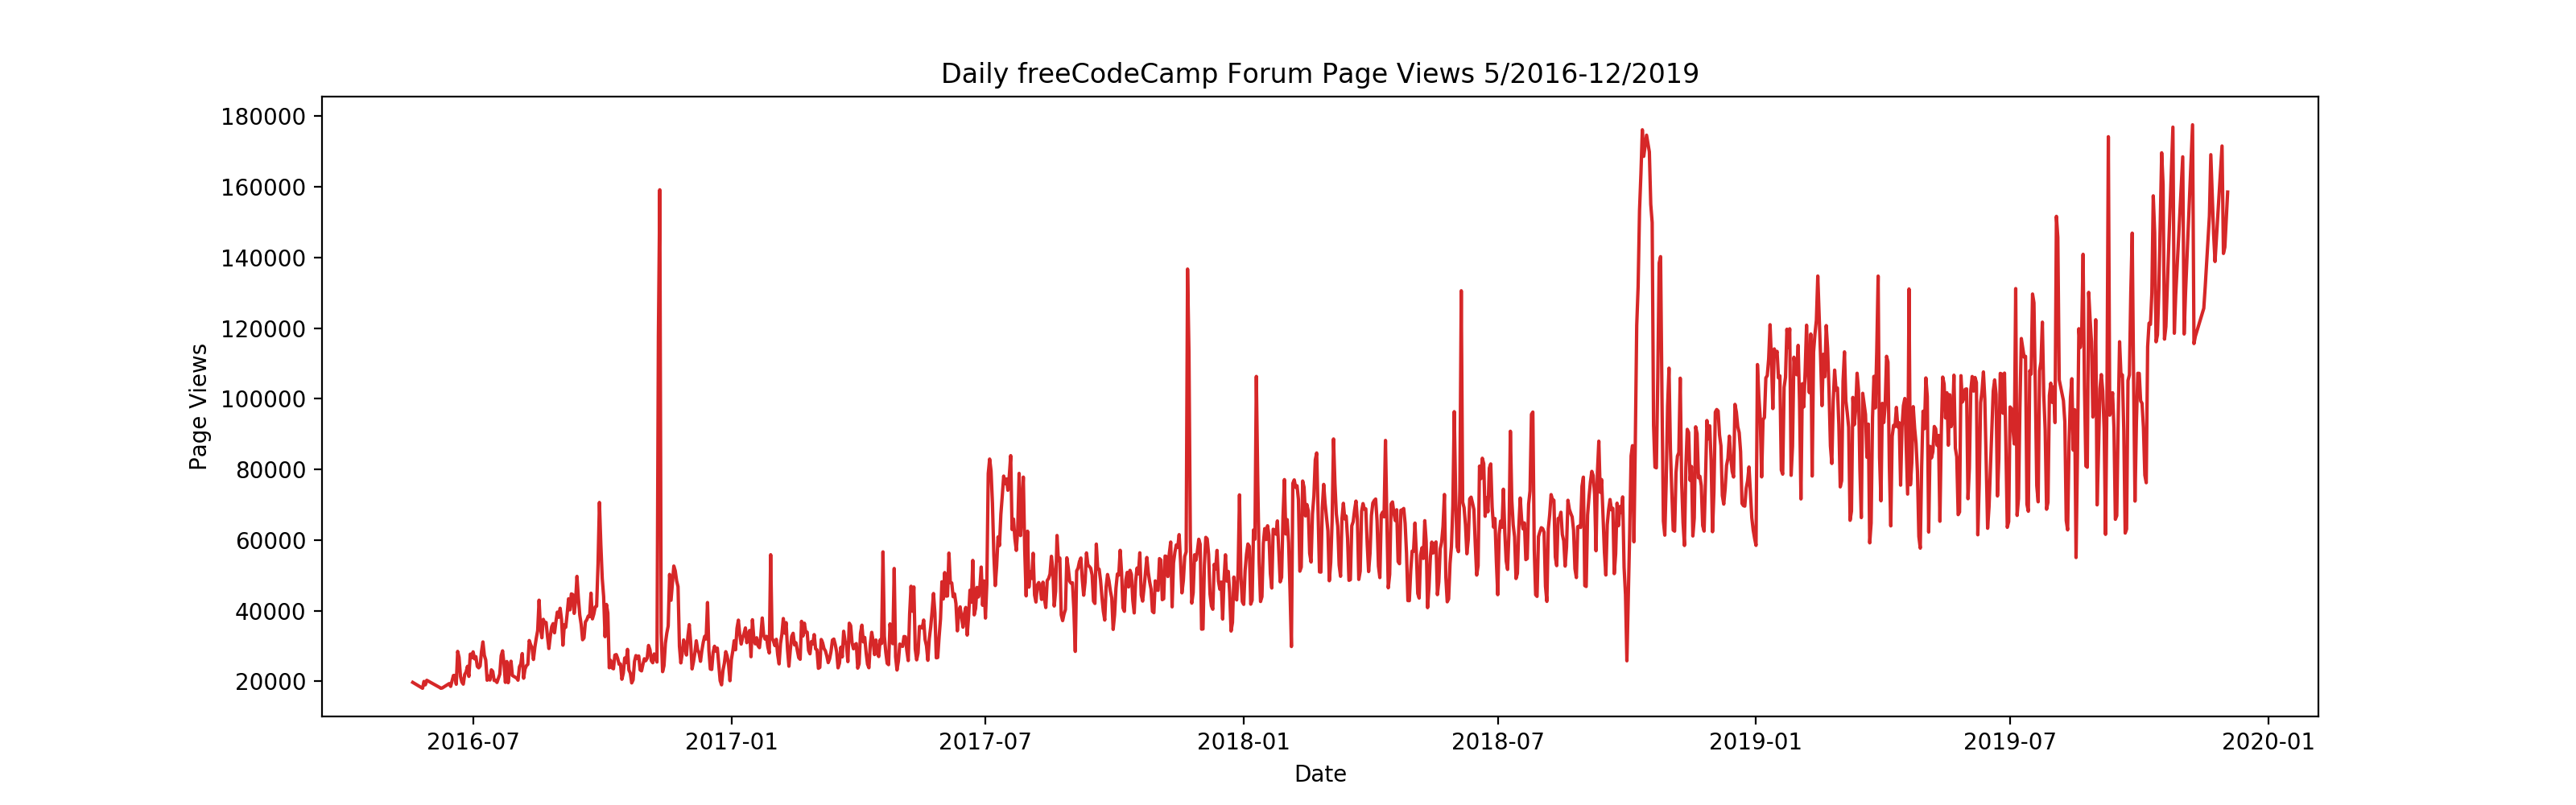

<center>Figure_1.png</center>

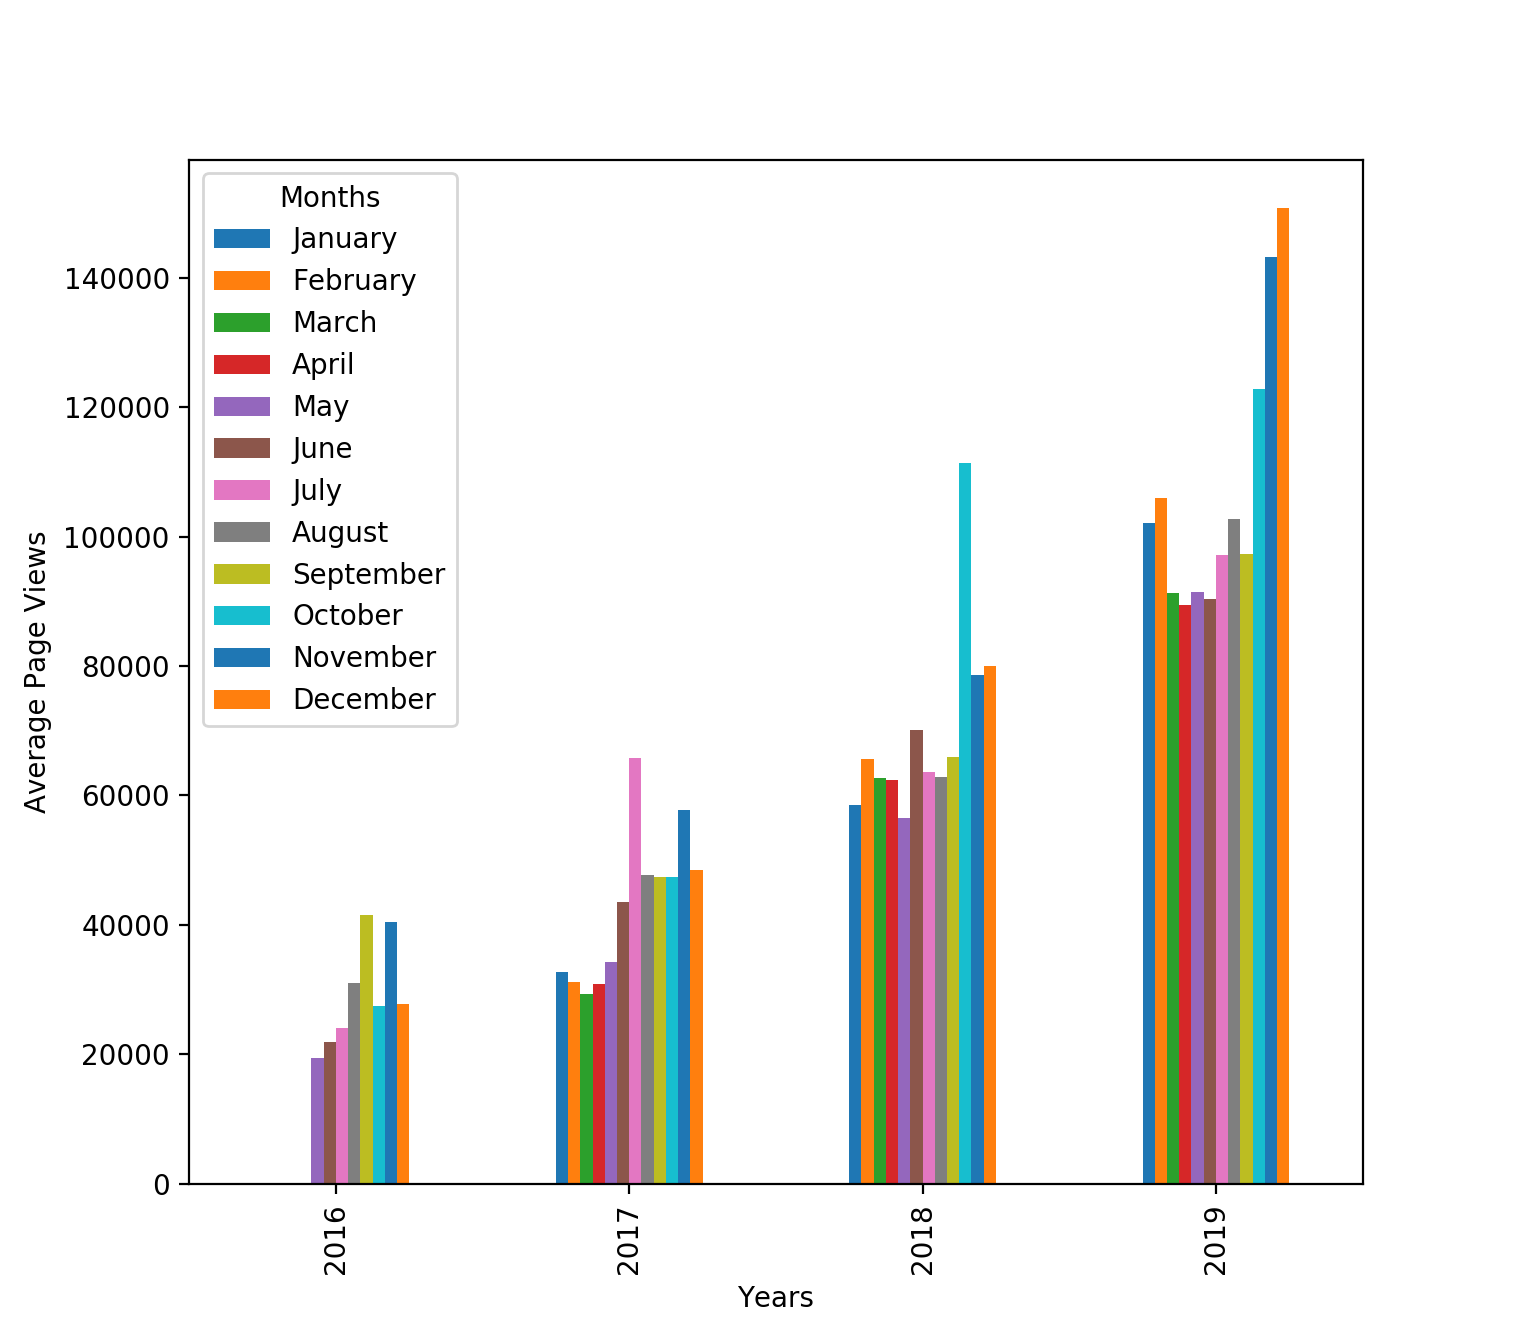

<center>Figura_2.png</center>

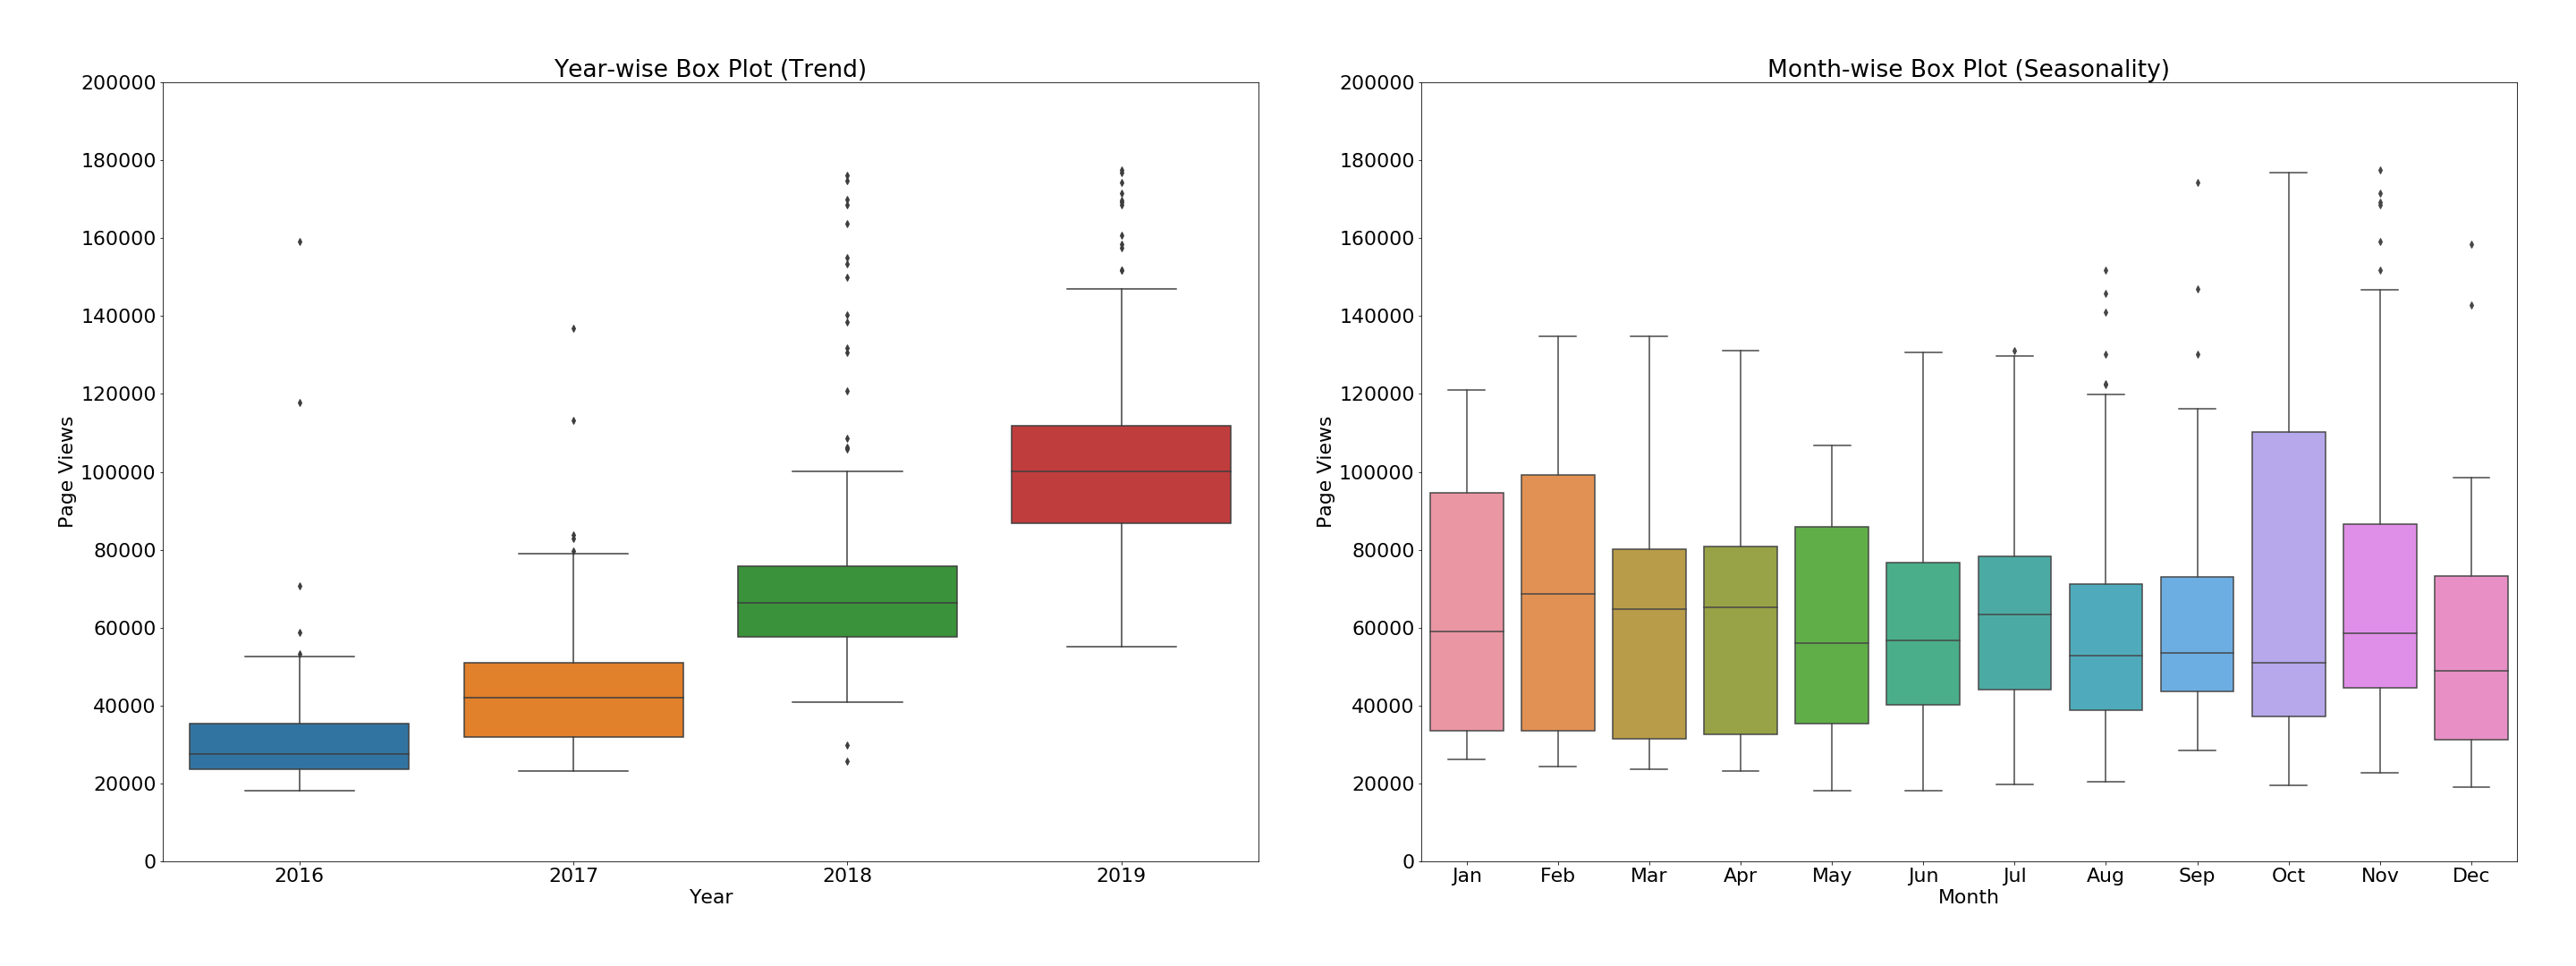

<center>Figura_3.png</center>

In [1]:
# importing the necessary libraries

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Answering the tasks

### 1. Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.

In [2]:
df = pd.read_csv('/content/fcc-forum-pageviews.csv',index_col='date', parse_dates=['date'])

df.shape

(1304, 1)

### 2. Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset. 

In [3]:
df = df[
    (df['value'] >= df['value'].quantile(0.025)) &
     (df['value'] <= df['value'].quantile(0.975))     
]

df.shape

(1238, 1)

### 3. Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "Figure_1.png".

The title should be ```Daily freeCodeCamp Forum Page Views 5/2016-12/2019```. The label on the x axis should be ```Date``` and the label on the y axis should be ```Page Views```.

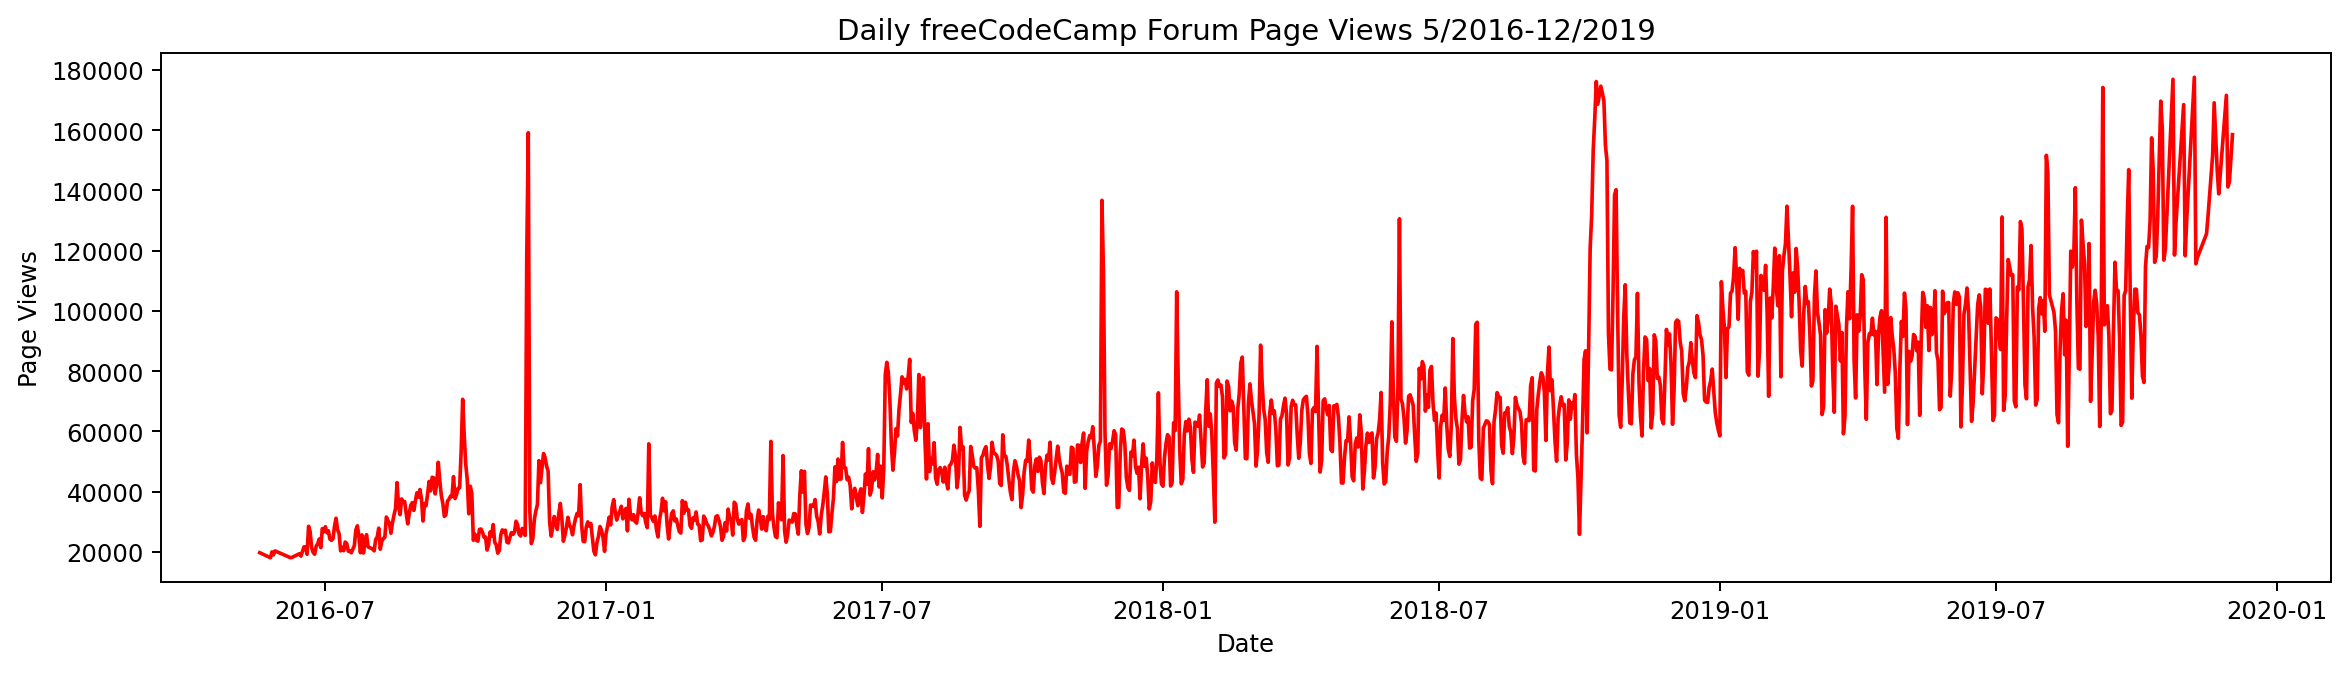

In [4]:
fig = plt.figure(figsize=(16,4), dpi=175)

plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

plt.xlabel('Date')
plt.ylabel('Page Views')

plt.gcf()

plt.plot(df, color='red')

### 4. Create a ```draw_bar_plot``` function that draws a bar chart similar to "Figure_2.png". 

It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of ```Months```. On the chart, the label on the x axis should be ```Years``` and the label on the y axis should be ```Average Page Views```.

In [5]:
df_bar = df.copy()


df_bar['Years'] = df_bar.index.year
df_bar['month_num'] = df_bar.index.month
df_bar['Months'] = df_bar.index.month_name()

df_bar = df_bar.sort_values(by='month_num')

legend = df_bar.index.month_name().unique()

df_bar.head(10)

,value,Years,month_num,Months
date,,,,
2017-01-06,37353,2017,1,January
2019-01-06,94108,2019,1,January
2019-01-05,77897,2019,1,January
2019-01-04,94514,2019,1,January
2019-01-03,100710,2019,1,January
2019-01-02,109708,2019,1,January
2019-01-01,58508,2019,1,January
2017-01-01,26185,2017,1,January
2017-01-02,28560,2017,1,January


In [6]:
df_bar = df_bar.groupby(['Years', 'Months'])['value'].mean().sort_index()
df_bar = df_bar.unstack()

df_bar.head(10)

Months,April,August,December,February,January,July,June,March,May,November,October,September
Years,,,,,,,,,,,,
2016,NaN,31049.193548,27832.419355,NaN,NaN,24109.678571,21875.105263,NaN,19432.400000,40448.633333,27398.322581,41476.866667
2017,30878.733333,47712.451613,48420.580645,31113.071429,32785.161290,65806.838710,43577.500000,29369.096774,34244.290323,57701.566667,47438.709677,47376.800000
2018,62350.833333,62831.612903,80047.483871,65679.000000,58580.096774,63591.064516,70117.000000,62693.774194,56562.870968,78688.333333,111378.142857,65941.733333
2019,89368.433333,102717.310345,150733.500000,105968.357143,102056.516129,97236.566667,90435.642857,91214.483871,91439.903226,143166.428571,122802.272727,97268.833333


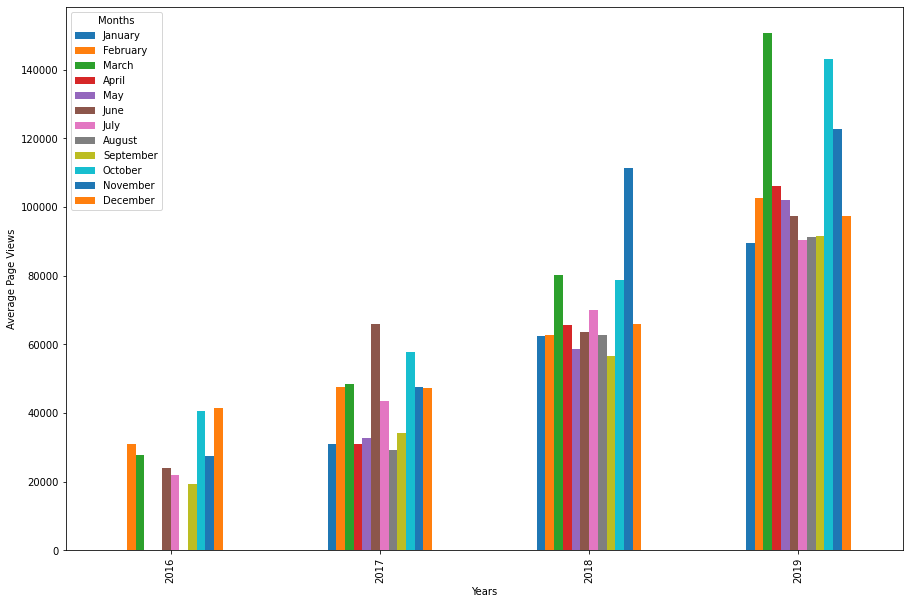

In [9]:
fig = df_bar.plot.bar(figsize=(15,10)).figure


plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.legend(title='Months', labels=legend)
